In [224]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [225]:
#Cargar desde un archivo .csv sin indice
df = pd.read_csv('Mexico.csv')
df.head(5)

,Unnamed: 0.1,Unnamed: 0,listing_url,last_scraped,source,name,neighborhood_overview,picture_url,host_url,host_name,...,beds,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_cleanliness,review_scores_communication,review_scores_location,reviews_per_month
0,0,0,https://www.airbnb.com/rooms/35797,2024-09-25,city scrape,Villa Dante,"Santa Fe Mall, Interloma Park and the Lion Des...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,...,1.0,1.0,7,363,0.0,4.80,4.90,4.90,4.90,1.70
1,1,1,https://www.airbnb.com/rooms/44616,2024-09-26,previous scrape,Condesa Haus,The neighborhood is very nice,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,...,1.0,1.0,365,325,64.0,4.58,4.70,4.78,4.98,0.41
2,2,2,https://www.airbnb.com/rooms/67703,2024-09-26,city scrape,"2 bedroom apt. deco bldg, Condesa",The neighborhood is very nice,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,...,2.0,2.0,30,325,49.0,4.90,4.75,4.92,4.98,0.31
3,3,3,https://www.airbnb.com/rooms/70644,2024-09-25,city scrape,Beautiful light Studio Coyoacan- full equipped !,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,...,1.0,1.6,180,257,127.0,4.91,4.96,4.98,4.96,0.83
4,4,4,https://www.airbnb.com/rooms/107078,2024-09-25,city scrape,NEW DESIGNER LOFT,"Is located in the best area of Mexico City, Po...",https://a0.muscache.com/pictures/bd64f86d-4931...,https://www.airbnb.com/users/show/540705,Andrea,...,1.0,1.0,365,275,11.0,4.91,5.00,4.73,4.91,0.11


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26582 entries, 0 to 26581
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0.1                 26582 non-null  int64  
 1   Unnamed: 0                   26582 non-null  int64  
 2   listing_url                  26582 non-null  object 
 3   last_scraped                 26582 non-null  object 
 4   source                       26582 non-null  object 
 5   name                         26582 non-null  object 
 6   neighborhood_overview        26582 non-null  object 
 7   picture_url                  26582 non-null  object 
 8   host_url                     26582 non-null  object 
 9   host_name                    26582 non-null  object 
 10  host_since                   26582 non-null  object 
 11  host_location                26582 non-null  object 
 12  host_about                   26582 non-null  object 
 13  host_response_ti

************************************************************************************

In [227]:
columnas_a_conservar = [
    "price", "room_type", "review_scores_cleanliness", "host_acceptance_rate",
    "host_identity_verified", "host_is_superhost", "instant_bookable",
    "accommodates", "bathrooms", "property_type"
]

# Filtrar DataFrame para mantener solo esas columnas
df = df[columnas_a_conservar]

In [228]:
dfC=df
dfC['room_type'] = dfC['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

In [229]:
df1 = dfC[dfC["room_type"] ==1]


#
Var_Dep= df1['price']
Vars_Indep= df1[['room_type']]

#
from sklearn.linear_model import LinearRegression
model= LinearRegression()


#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [230]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)

LinearRegression()

In [231]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(1671.496170016702)}

<Axes: xlabel='room_type', ylabel='price'>

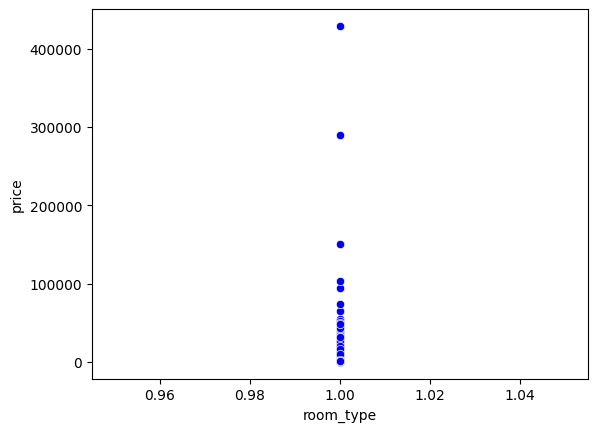

In [232]:
#
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)


In [233]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['room_type']])
y_pred


array([1671.49617002, 1671.49617002, 1671.49617002, ..., 1671.49617002,
       1671.49617002, 1671.49617002], shape=(17363,))

In [234]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1671.49617,3865.0,1,4.90,0.9,t,f,f,2.0,1.0,Entire villa
1,1671.49617,100.0,1,4.70,93%,t,t,f,2.9,1.0,Entire home
2,1671.49617,2029.0,1,4.75,57%,t,t,f,4.0,1.0,Entire rental unit
3,1671.49617,1140.0,1,4.96,100%,t,t,f,2.0,1.0,Entire rental unit
4,1671.49617,3633.0,1,5.00,100%,t,t,f,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...
26572,1671.49617,700.0,1,4.90,0.9,t,f,f,4.0,1.0,Entire rental unit
26573,1671.49617,1900.0,1,4.90,0.9,t,f,f,4.0,2.0,Entire condo
26574,1671.49617,1200.0,1,4.90,0.9,t,f,f,2.0,1.0,Entire rental unit
26575,1671.49617,1358.0,1,4.90,100%,t,f,t,3.0,1.0,Entire rental unit


<Axes: xlabel='room_type', ylabel='price'>

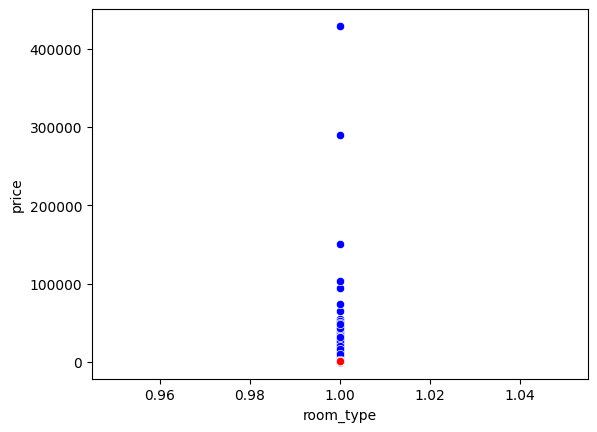

In [235]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y='Predicciones', color="red", data=df1)


In [236]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0

In [237]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.0)

room_type 2 ---------------------------------------------------

In [238]:
df1 = dfC[dfC["room_type"] ==2]

In [239]:
Var_Dep= df1['price']
Vars_Indep= df1['room_type'].to_frame()

In [240]:
#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [241]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [242]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)

LinearRegression()

In [243]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(739.5352582537674)}

<Axes: xlabel='room_type', ylabel='price'>

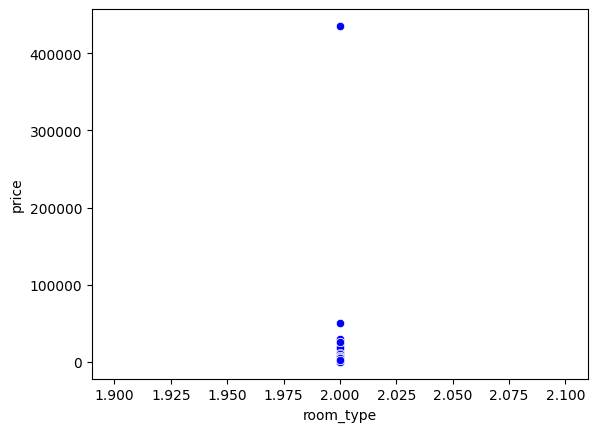

In [244]:
#
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)


In [245]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['room_type']])
y_pred


array([739.53525825, 739.53525825, 739.53525825, ..., 739.53525825,
       739.53525825, 739.53525825], shape=(8693,))

In [246]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
5,739.535258,100.0,2,4.90,0.9,f,f,f,2.0,1.0,Private room
7,739.535258,335.0,2,4.61,78%,t,t,f,2.0,1.0,Private room in rental unit
10,739.535258,384.0,2,4.92,100%,t,t,f,1.0,1.5,Private room in home
11,739.535258,947.0,2,4.97,0.9,f,f,f,1.0,1.0,Private room in condo
12,739.535258,1200.0,2,4.97,75%,t,f,f,2.0,1.0,Private room in guest suite
...,...,...,...,...,...,...,...,...,...,...,...
26576,739.535258,262.0,2,4.90,0.9,t,f,t,2.0,2.0,Private room in home
26577,739.535258,488.0,2,4.90,100%,t,t,t,4.0,1.0,Private room in guesthouse
26578,739.535258,2800.0,2,4.90,100%,t,f,t,2.0,1.0,Room in hotel
26579,739.535258,2700.0,2,4.90,100%,t,f,t,2.0,1.0,Room in hotel


<Axes: xlabel='room_type', ylabel='price'>

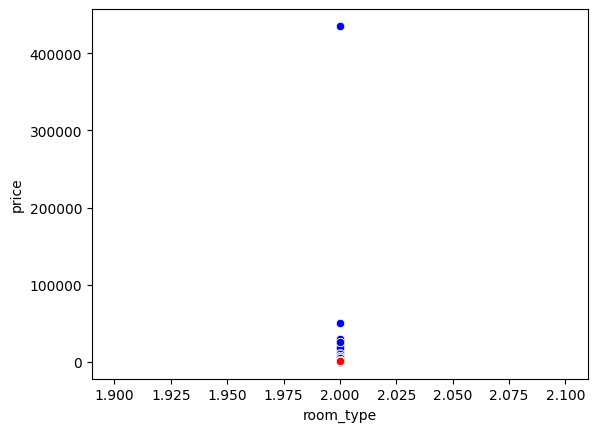

In [247]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y='Predicciones', color="red", data=df1)


In [248]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0

In [249]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.0)

room_type 3***********************************************************

In [250]:
df1 = dfC[dfC["room_type"] ==3]

In [251]:
Var_Dep= df1['price']
Vars_Indep= df1[['room_type']]


In [252]:
#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [253]:
#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [254]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)

LinearRegression()

In [255]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(599.0074812967581)}

<Axes: xlabel='room_type', ylabel='price'>

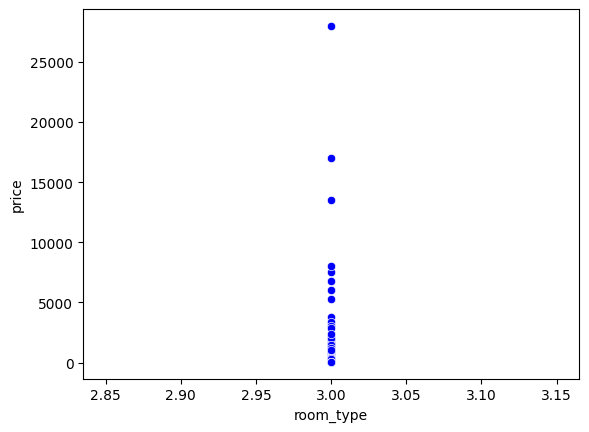

In [256]:
#
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)


In [257]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['room_type']])
y_pred


array([599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0074813,
       599.0074813, 599.0074813, 599.0074813, 599.0074813, 599.0

In [258]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
115,599.007481,100.0,3,4.90,0.9,f,f,f,2.0,1.0,Shared room in rental unit
258,599.007481,640.0,3,4.90,0%,t,f,t,1.0,1.5,Shared room in loft
366,599.007481,290.0,3,4.47,85%,t,t,f,2.9,1.3,Shared room in guesthouse
444,599.007481,5314.0,3,4.90,31%,t,f,f,2.9,1.3,Shared room in hostel
456,599.007481,550.0,3,4.93,94%,t,t,t,2.9,3.0,Shared room in home
...,...,...,...,...,...,...,...,...,...,...,...
26261,599.007481,1200.0,3,4.90,100%,t,f,f,6.0,1.0,Shared room in home
26336,599.007481,70.0,3,4.90,100%,t,f,t,2.0,1.0,Shared room in rental unit
26371,599.007481,70.0,3,4.90,100%,t,f,t,2.0,1.0,Shared room in rental unit
26447,599.007481,1058.0,3,5.00,0.9,t,f,f,2.9,2.5,Shared room in guesthouse


<Axes: xlabel='room_type', ylabel='price'>

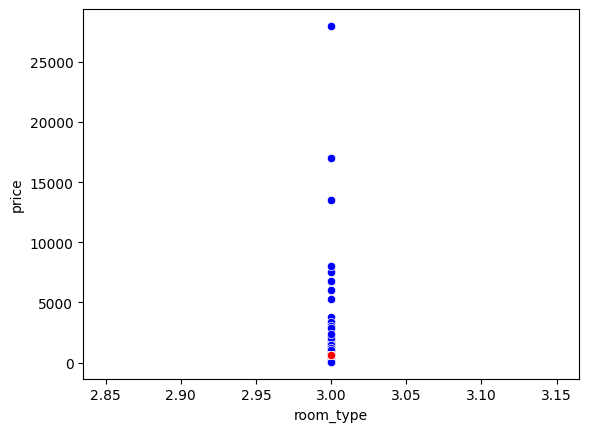

In [259]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='room_type', y='price', color="blue", data=df1)
sns.scatterplot(x='room_type', y='Predicciones', color="red", data=df1)


In [260]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0

In [261]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.0)

room_type 4************************************************

In [262]:
df1 = dfC[dfC["room_type"] ==4]

In [263]:
Var_Dep= df1['price']
Vars_Indep= df1['room_type'].to_frame()


In [264]:
#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [265]:
#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [266]:
#Ajustamos el modelo con las variables antes declaradas
#model.fit(X = Vars_Indep, y=Var_Dep)


In [267]:
print(df['room_type'].value_counts())

#NO hay registros para esta varaible 


room_type
1    17363
2     8693
3      401
4      125
Name: count, dtype: int64


**review_scores_cleanliness**


In [268]:
df1=df

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

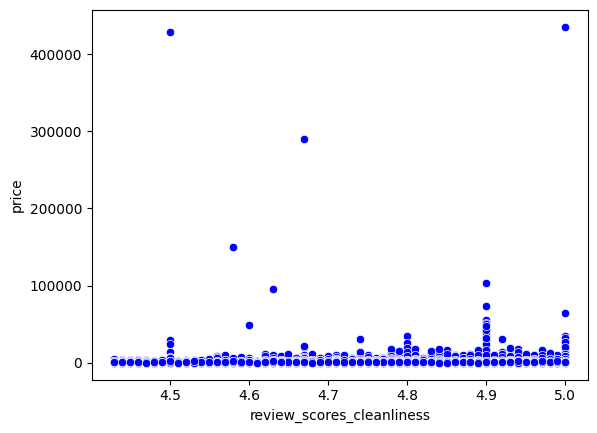

In [269]:
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)

In [270]:
Var_Dep= df1['price']
Vars_Indep=df1[['review_scores_cleanliness']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [271]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [272]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([511.43749585]),
 'rank_': 1,
 'singular_': array([21.65721428]),
 'intercept_': np.float64(-1126.974521567463)}

*****************************************************************************

In [273]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['review_scores_cleanliness']])
y_pred


array([1379.06920809, 1276.78170892, 1302.35358371, ..., 1379.06920809,
       1379.06920809, 1379.06920809], shape=(26582,))

In [274]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones', y_pred)
df1


,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1379.069208,3865.0,1,4.90,0.9,t,f,f,2.0,1.0,Entire villa
1,1276.781709,100.0,1,4.70,93%,t,t,f,2.9,1.0,Entire home
2,1302.353584,2029.0,1,4.75,57%,t,t,f,4.0,1.0,Entire rental unit
3,1409.755458,1140.0,1,4.96,100%,t,t,f,2.0,1.0,Entire rental unit
4,1430.212958,3633.0,1,5.00,100%,t,t,f,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...
26577,1379.069208,488.0,2,4.90,100%,t,t,t,4.0,1.0,Private room in guesthouse
26578,1379.069208,2800.0,2,4.90,100%,t,f,t,2.0,1.0,Room in hotel
26579,1379.069208,2700.0,2,4.90,100%,t,f,t,2.0,1.0,Room in hotel
26580,1379.069208,2600.0,2,4.90,100%,t,f,t,2.0,1.0,Room in hotel


<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

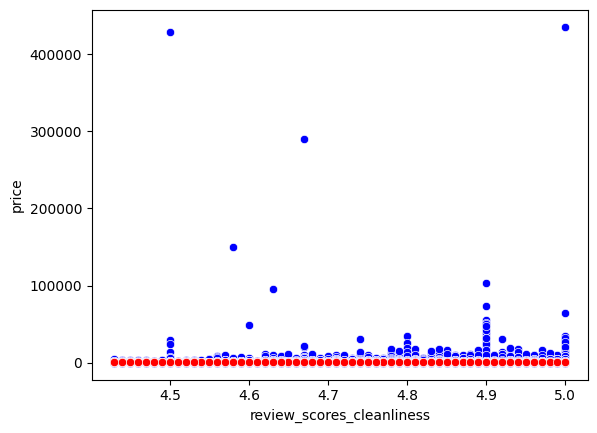

In [275]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='review_scores_cleanliness', y='price', color="blue", data=df1)
sns.scatterplot(x='review_scores_cleanliness', y='Predicciones', color="red", data=df1)


In [276]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.00020087605081864357

In [277]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.01417307485405491)

*******************************************************

In [278]:
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.rstrip('%').astype(float) / 100


In [279]:
print(df1['host_acceptance_rate'].dtype)


float64


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

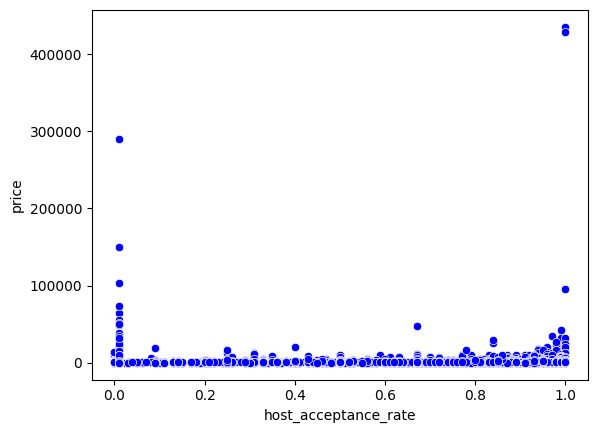

In [280]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1) 


In [281]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Var_Dep= df1['price']
Vars_Indep= df1[['host_acceptance_rate']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [282]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [283]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([148.15864042]),
 'rank_': 1,
 'singular_': array([57.64688626]),
 'intercept_': np.float64(1237.7870822952436)}

In [284]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['host_acceptance_rate']])
y_pred


array([1239.12051006, 1375.57461789, 1322.23750734, ..., 1385.94572272,
       1385.94572272, 1385.94572272], shape=(26582,))

In [285]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones2', y_pred)
df1


,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1239.120510,1379.069208,3865.0,1,4.90,0.009,t,f,f,2.0,1.0,Entire villa
1,1375.574618,1276.781709,100.0,1,4.70,0.930,t,t,f,2.9,1.0,Entire home
2,1322.237507,1302.353584,2029.0,1,4.75,0.570,t,t,f,4.0,1.0,Entire rental unit
3,1385.945723,1409.755458,1140.0,1,4.96,1.000,t,t,f,2.0,1.0,Entire rental unit
4,1385.945723,1430.212958,3633.0,1,5.00,1.000,t,t,f,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1385.945723,1379.069208,488.0,2,4.90,1.000,t,t,t,4.0,1.0,Private room in guesthouse
26578,1385.945723,1379.069208,2800.0,2,4.90,1.000,t,f,t,2.0,1.0,Room in hotel
26579,1385.945723,1379.069208,2700.0,2,4.90,1.000,t,f,t,2.0,1.0,Room in hotel
26580,1385.945723,1379.069208,2600.0,2,4.90,1.000,t,f,t,2.0,1.0,Room in hotel


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

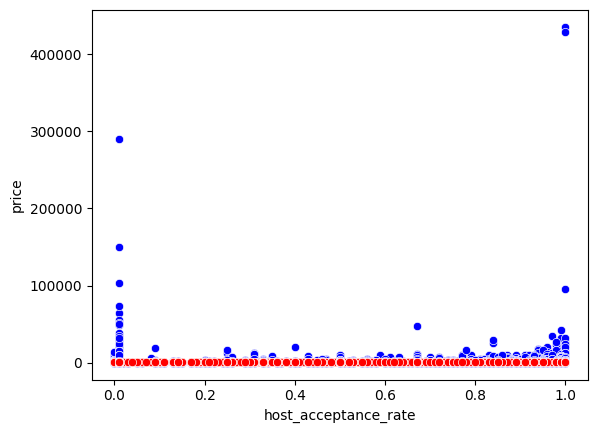

In [286]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='host_acceptance_rate', y='price', color="blue", data=df1)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones2', color="red", data=df1)


In [287]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.00011943827468130497

In [288]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.010928781939507484)

**host_identity_verified**
*******************************************************

In [289]:
df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})

C:\Users\ady_b\AppData\Local\Temp\ipykernel_27296\3355181784.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_identity_verified'] = df1['host_identity_verified'].replace({'f': 0, 't': 1})


<Axes: xlabel='host_identity_verified', ylabel='price'>

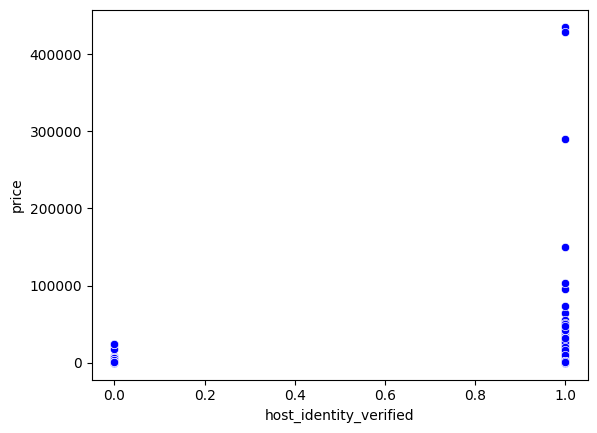

In [290]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1) 


In [291]:

Var_Dep= df1['price']
Vars_Indep= df1['host_identity_verified'].to_frame()

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [292]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [293]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([844.55633146]),
 'rank_': 1,
 'singular_': array([33.25248541]),
 'intercept_': np.float64(548.3806228373822)}

In [294]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['host_identity_verified']])
y_pred


array([1392.9369543, 1392.9369543, 1392.9369543, ..., 1392.9369543,
       1392.9369543, 1392.9369543], shape=(26582,))

In [295]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones3', y_pred)
df1


,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1392.936954,1239.120510,1379.069208,3865.0,1,4.90,0.009,1,f,f,2.0,1.0,Entire villa
1,1392.936954,1375.574618,1276.781709,100.0,1,4.70,0.930,1,t,f,2.9,1.0,Entire home
2,1392.936954,1322.237507,1302.353584,2029.0,1,4.75,0.570,1,t,f,4.0,1.0,Entire rental unit
3,1392.936954,1385.945723,1409.755458,1140.0,1,4.96,1.000,1,t,f,2.0,1.0,Entire rental unit
4,1392.936954,1385.945723,1430.212958,3633.0,1,5.00,1.000,1,t,f,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1392.936954,1385.945723,1379.069208,488.0,2,4.90,1.000,1,t,t,4.0,1.0,Private room in guesthouse
26578,1392.936954,1385.945723,1379.069208,2800.0,2,4.90,1.000,1,f,t,2.0,1.0,Room in hotel
26579,1392.936954,1385.945723,1379.069208,2700.0,2,4.90,1.000,1,f,t,2.0,1.0,Room in hotel
26580,1392.936954,1385.945723,1379.069208,2600.0,2,4.90,1.000,1,f,t,2.0,1.0,Room in hotel


<Axes: xlabel='host_identity_verified', ylabel='price'>

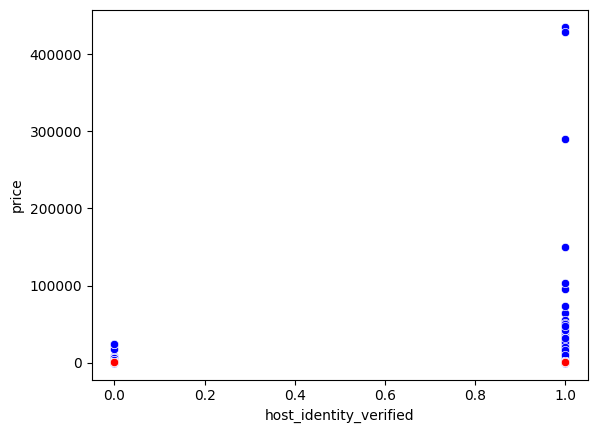

In [296]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='host_identity_verified', y='price', color="blue", data=df1)
sns.scatterplot(x='host_identity_verified', y='Predicciones3', color="red", data=df1)


In [297]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0012913480524616716

In [298]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl



np.float64(0.0359353315340442)

**host_is_superhost**
*****************************************************

In [299]:
df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})

C:\Users\ady_b\AppData\Local\Temp\ipykernel_27296\4038004741.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['host_is_superhost'] = df1['host_is_superhost'].replace({'f': 0, 't': 1})


<Axes: xlabel='host_is_superhost', ylabel='price'>

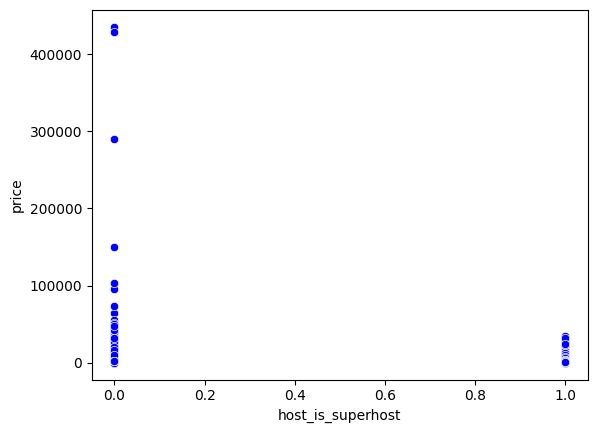

In [300]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1) 


In [301]:

Var_Dep= df1['price']
Vars_Indep= df1['host_is_superhost'].to_frame()

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [302]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [303]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([119.16931112]),
 'rank_': 1,
 'singular_': array([79.51024567]),
 'intercept_': np.float64(1309.7730522682493)}

In [304]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['host_is_superhost']])
y_pred


array([1309.77305227, 1428.94236339, 1428.94236339, ..., 1309.77305227,
       1309.77305227, 1428.94236339], shape=(26582,))

In [305]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones4', y_pred)
df1


,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1309.773052,1392.936954,1239.120510,1379.069208,3865.0,1,4.90,0.009,1,0,f,2.0,1.0,Entire villa
1,1428.942363,1392.936954,1375.574618,1276.781709,100.0,1,4.70,0.930,1,1,f,2.9,1.0,Entire home
2,1428.942363,1392.936954,1322.237507,1302.353584,2029.0,1,4.75,0.570,1,1,f,4.0,1.0,Entire rental unit
3,1428.942363,1392.936954,1385.945723,1409.755458,1140.0,1,4.96,1.000,1,1,f,2.0,1.0,Entire rental unit
4,1428.942363,1392.936954,1385.945723,1430.212958,3633.0,1,5.00,1.000,1,1,f,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1428.942363,1392.936954,1385.945723,1379.069208,488.0,2,4.90,1.000,1,1,t,4.0,1.0,Private room in guesthouse
26578,1309.773052,1392.936954,1385.945723,1379.069208,2800.0,2,4.90,1.000,1,0,t,2.0,1.0,Room in hotel
26579,1309.773052,1392.936954,1385.945723,1379.069208,2700.0,2,4.90,1.000,1,0,t,2.0,1.0,Room in hotel
26580,1309.773052,1392.936954,1385.945723,1379.069208,2600.0,2,4.90,1.000,1,0,t,2.0,1.0,Room in hotel


<Axes: xlabel='host_is_superhost', ylabel='price'>

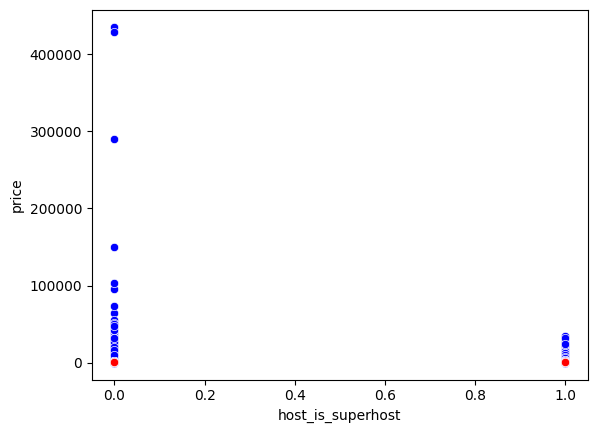

In [306]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='host_is_superhost', y='price', color="blue", data=df1)
sns.scatterplot(x='host_is_superhost', y='Predicciones4', color="red", data=df1)


In [307]:
#Corroboramos cuál es el coeficiente de Determinación de nuestro modelo 
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.0001469984965664084

In [308]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.01212429365226727)

**instant_bookable**
**********************************************************

In [309]:
df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})

C:\Users\ady_b\AppData\Local\Temp\ipykernel_27296\1876949163.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['instant_bookable'] = df1['instant_bookable'].replace({'f': 0, 't': 1})


<Axes: xlabel='instant_bookable', ylabel='price'>

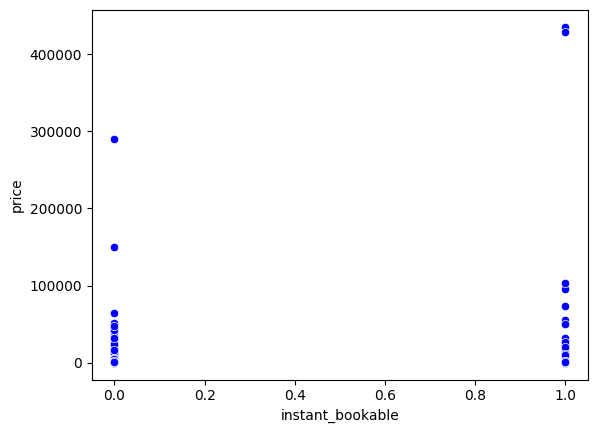

In [310]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1) 


In [311]:

Var_Dep= df1['price']
Vars_Indep= df1[['instant_bookable']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [312]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [313]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([403.24268255]),
 'rank_': 1,
 'singular_': array([79.70493324]),
 'intercept_': np.float64(1196.8959577114244)}

In [314]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['instant_bookable']])
y_pred


array([1196.89595771, 1196.89595771, 1196.89595771, ..., 1600.13864026,
       1600.13864026, 1600.13864026], shape=(26582,))

In [315]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones5', y_pred)
df1


,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1196.895958,1309.773052,1392.936954,1239.120510,1379.069208,3865.0,1,4.90,0.009,1,0,0,2.0,1.0,Entire villa
1,1196.895958,1428.942363,1392.936954,1375.574618,1276.781709,100.0,1,4.70,0.930,1,1,0,2.9,1.0,Entire home
2,1196.895958,1428.942363,1392.936954,1322.237507,1302.353584,2029.0,1,4.75,0.570,1,1,0,4.0,1.0,Entire rental unit
3,1196.895958,1428.942363,1392.936954,1385.945723,1409.755458,1140.0,1,4.96,1.000,1,1,0,2.0,1.0,Entire rental unit
4,1196.895958,1428.942363,1392.936954,1385.945723,1430.212958,3633.0,1,5.00,1.000,1,1,0,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1600.138640,1428.942363,1392.936954,1385.945723,1379.069208,488.0,2,4.90,1.000,1,1,1,4.0,1.0,Private room in guesthouse
26578,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2800.0,2,4.90,1.000,1,0,1,2.0,1.0,Room in hotel
26579,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2700.0,2,4.90,1.000,1,0,1,2.0,1.0,Room in hotel
26580,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2600.0,2,4.90,1.000,1,0,1,2.0,1.0,Room in hotel


<Axes: xlabel='instant_bookable', ylabel='price'>

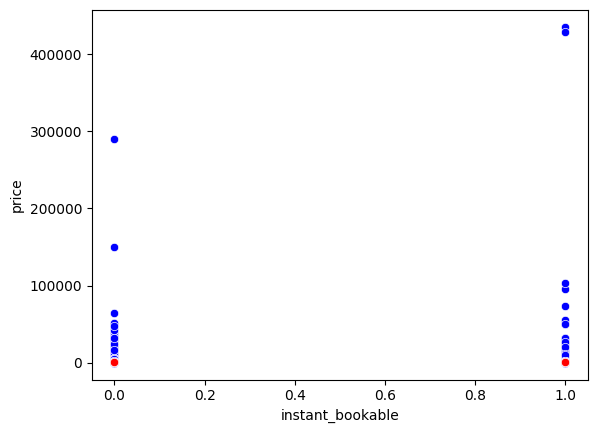

In [316]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='instant_bookable', y='price', color="blue", data=df1)
sns.scatterplot(x='instant_bookable', y='Predicciones5', color="red", data=df1)


In [317]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.001691380190229852

In [318]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.04112639286674497)

**bathrooms**
*************************************************

<Axes: xlabel='bathrooms', ylabel='accommodates'>

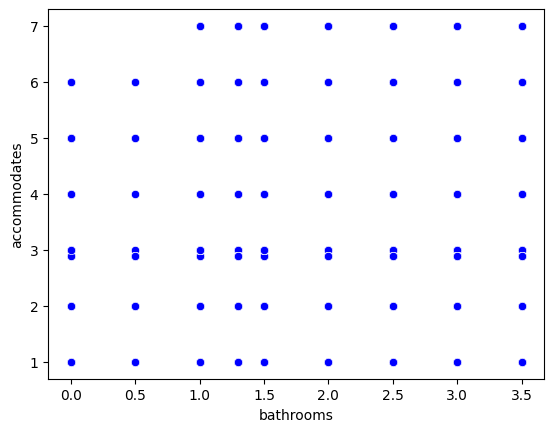

In [319]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1) 


In [320]:

Var_Dep= df1['accommodates']
Vars_Indep= df1[['bathrooms']]

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [321]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [322]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.02863289]),
 'rank_': 1,
 'singular_': array([90.16715429]),
 'intercept_': np.float64(1.5814585309063331)}

In [323]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['bathrooms']])
y_pred


array([2.61009142, 2.61009142, 2.61009142, ..., 2.61009142, 2.61009142,
       2.61009142], shape=(26582,))

In [324]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones6', y_pred)
df1


,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,2.610091,1196.895958,1309.773052,1392.936954,1239.120510,1379.069208,3865.0,1,4.90,0.009,1,0,0,2.0,1.0,Entire villa
1,2.610091,1196.895958,1428.942363,1392.936954,1375.574618,1276.781709,100.0,1,4.70,0.930,1,1,0,2.9,1.0,Entire home
2,2.610091,1196.895958,1428.942363,1392.936954,1322.237507,1302.353584,2029.0,1,4.75,0.570,1,1,0,4.0,1.0,Entire rental unit
3,2.610091,1196.895958,1428.942363,1392.936954,1385.945723,1409.755458,1140.0,1,4.96,1.000,1,1,0,2.0,1.0,Entire rental unit
4,3.124408,1196.895958,1428.942363,1392.936954,1385.945723,1430.212958,3633.0,1,5.00,1.000,1,1,0,2.0,1.5,Entire loft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,2.610091,1600.138640,1428.942363,1392.936954,1385.945723,1379.069208,488.0,2,4.90,1.000,1,1,1,4.0,1.0,Private room in guesthouse
26578,2.610091,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2800.0,2,4.90,1.000,1,0,1,2.0,1.0,Room in hotel
26579,2.610091,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2700.0,2,4.90,1.000,1,0,1,2.0,1.0,Room in hotel
26580,2.610091,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2600.0,2,4.90,1.000,1,0,1,2.0,1.0,Room in hotel


<Axes: xlabel='bathrooms', ylabel='accommodates'>

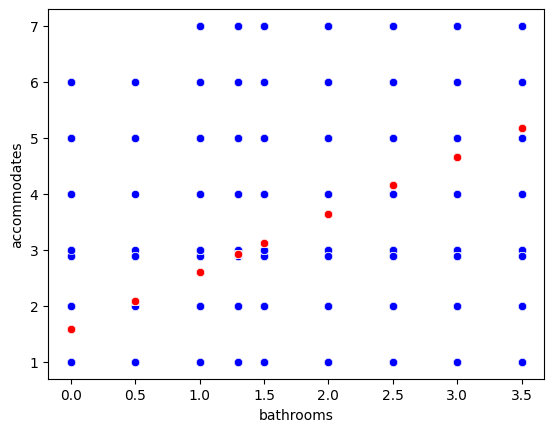

In [325]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='bathrooms', y='accommodates', color="blue", data=df1)
sns.scatterplot(x='bathrooms', y='Predicciones6', color="red", data=df1)


In [326]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter


0.15635537821282397

In [327]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl


np.float64(0.39541797912187043)

In [328]:
df['property_type'].unique()


array(['Entire villa', 'Entire home', 'Entire rental unit', 'Entire loft',
       'Private room', 'Private room in rental unit',
       'Private room in home', 'Private room in condo',
       'Private room in guest suite', 'Entire condo',
       'Private room in serviced apartment', 'Room in serviced apartment',
       'Entire guest suite', 'Private room in townhouse',
       'Room in boutique hotel', 'Private room in bed and breakfast',
       'Shared room in rental unit', 'Entire serviced apartment',
       'Tiny home', 'Entire guesthouse', 'Private room in guesthouse',
       'Private room in loft', 'Entire bungalow', 'Casa particular',
       'Shared room in loft', 'Entire townhouse',
       'Private room in tiny home', 'Shared room in guesthouse',
       'Room in bed and breakfast', 'Shared room in hostel',
       'Private room in farm stay', 'Shared room in home',
       'Private room in villa', 'Entire cabin',
       'Private room in casa particular', 'Room in hotel',
       'Pr

**property_type**
********************************************************

In [329]:
df1['property_type'] = df1['property_type'].replace({
    'Entire villa': 1, 'Entire home': 2, 'Entire rental unit': 3, 'Entire loft': 4,
    'Private room': 5, 'Private room in rental unit': 6, 'Private room in home': 7,
    'Private room in condo': 8, 'Private room in guest suite': 9, 'Entire condo': 10,
    'Private room in serviced apartment': 11, 'Room in serviced apartment': 12,
    'Entire guest suite': 13, 'Private room in townhouse': 14, 'Room in boutique hotel': 15,
    'Private room in bed and breakfast': 16, 'Shared room in rental unit': 17,
    'Entire serviced apartment': 18, 'Tiny home': 19, 'Entire guesthouse': 20,
    'Private room in guesthouse': 21, 'Private room in loft': 22, 'Entire bungalow': 23,
    'Casa particular': 24, 'Shared room in loft': 25, 'Entire townhouse': 26,
    'Private room in tiny home': 27, 'Shared room in guesthouse': 28, 'Room in bed and breakfast': 29,
    'Shared room in hostel': 30, 'Private room in farm stay': 31, 'Shared room in home': 32,
    'Private room in villa': 33, 'Entire cabin': 34, 'Private room in casa particular': 35,
    'Room in hotel': 36, 'Private room in floor': 37, 'Private room in cabin': 38,
    'Shared room in guest suite': 39, 'Room in aparthotel': 40, 'Entire place': 41,
    'Private room in hostel': 42, 'Earthen home': 43, 'Entire hostel': 44,
    'Private room in earthen home': 45, 'Private room in dorm': 46, 'Private room in hut': 47,
    'Entire cottage': 48, 'Entire chalet': 49, 'Shared room in dorm': 50,
    'Entire in-law': 51, 'Holiday park': 52, 'Private room in dome': 53,
    'Shared room in condo': 54, 'Campsite': 55, 'Private room in vacation home': 56,
    'Room in casa particular': 57, 'Castle': 58, 'Private room in barn': 59,
    'Shared room in hotel': 60, 'Farm stay': 61, 'Shared room in tiny home': 62,
    'Hut': 63, 'Shared room in cabin': 64, 'Private room in cottage': 65,
    'Entire home/apt': 66, 'Room in hostel': 67, 'Shared room in serviced apartment': 68,
    'Entire vacation home': 69, 'Shared room in tent': 70, 'Shared room in bed and breakfast': 71,
    'Private room in shipping container': 72, 'Private room in nature lodge': 73,
    'Private room in tower': 74, 'Private room in lighthouse': 75,
    'Shared room in casa particular': 76, 'Shared room in townhouse': 77,
    'Shared room in farm stay': 78, 'Shared room in boutique hotel': 79,
    'Shipping container': 80, 'Private room in pension': 81, 'Private room in bungalow': 82,
    'Dome': 83, 'Tent': 84, 'Private room in chalet': 85, 'Private room in tent': 86,
    'Private room in castle': 87, 'Private room in houseboat': 88, 'Boat': 89,
    'Private room in resort': 90, 'Private room in minsu': 91, 'Tower': 92
})


C:\Users\ady_b\AppData\Local\Temp\ipykernel_27296\3369444087.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['property_type'] = df1['property_type'].replace({


<Axes: xlabel='property_type', ylabel='price'>

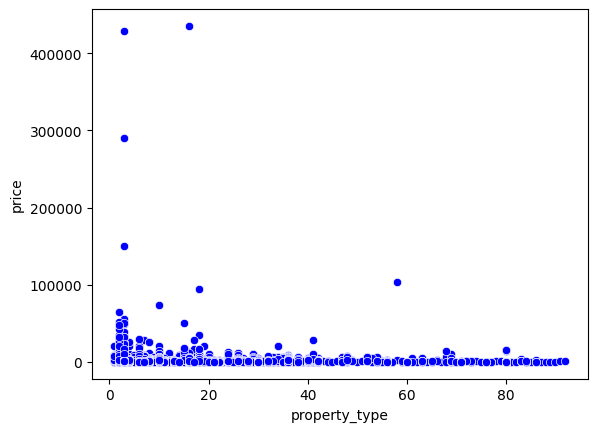

In [330]:
#Imprimimos  el scatter plot entre la variable dependiente (total) e independiente (a)
#para observar el comportamiento en su dispersión
from turtle import color

sns.scatterplot(x='property_type', y='price', color="blue", data=df1) 


In [331]:
Var_Dep= df1['price']
Vars_Indep= df1['property_type'].to_frame()

#Se define moel como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Verificamos la función relacionada al modelo
type(model)


sklearn.linear_model._base.LinearRegression

In [332]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X = Vars_Indep, y=Var_Dep)


LinearRegression()

In [333]:
#Verificamos los coeficientes obtenidos para el modelo ajustado  coef = a    intercept = b
model.__dict__


{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-11.70936084]),
 'rank_': 1,
 'singular_': array([1645.4325847]),
 'intercept_': np.float64(1457.3492997999103)}

In [334]:
#Predecimos los valores de total de accidentes a partir de la variable 'alcohol' x 
y_pred= model.predict(X=df1[['property_type']])
y_pred


array([1445.63993896, 1433.93057811, 1422.22121727, ..., 1035.81230941,
       1035.81230941, 1422.22121727], shape=(26582,))

In [335]:
#Insertamos la columna de predicciones en el DataFrame
df1.insert(0, 'Predicciones7', y_pred)
df1


,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
0,1445.639939,2.610091,1196.895958,1309.773052,1392.936954,1239.120510,1379.069208,3865.0,1,4.90,0.009,1,0,0,2.0,1.0,1
1,1433.930578,2.610091,1196.895958,1428.942363,1392.936954,1375.574618,1276.781709,100.0,1,4.70,0.930,1,1,0,2.9,1.0,2
2,1422.221217,2.610091,1196.895958,1428.942363,1392.936954,1322.237507,1302.353584,2029.0,1,4.75,0.570,1,1,0,4.0,1.0,3
3,1422.221217,2.610091,1196.895958,1428.942363,1392.936954,1385.945723,1409.755458,1140.0,1,4.96,1.000,1,1,0,2.0,1.0,3
4,1410.511856,3.124408,1196.895958,1428.942363,1392.936954,1385.945723,1430.212958,3633.0,1,5.00,1.000,1,1,0,2.0,1.5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26577,1211.452722,2.610091,1600.138640,1428.942363,1392.936954,1385.945723,1379.069208,488.0,2,4.90,1.000,1,1,1,4.0,1.0,21
26578,1035.812309,2.610091,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2800.0,2,4.90,1.000,1,0,1,2.0,1.0,36
26579,1035.812309,2.610091,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2700.0,2,4.90,1.000,1,0,1,2.0,1.0,36
26580,1035.812309,2.610091,1600.138640,1309.773052,1392.936954,1385.945723,1379.069208,2600.0,2,4.90,1.000,1,0,1,2.0,1.0,36


<Axes: xlabel='property_type', ylabel='price'>

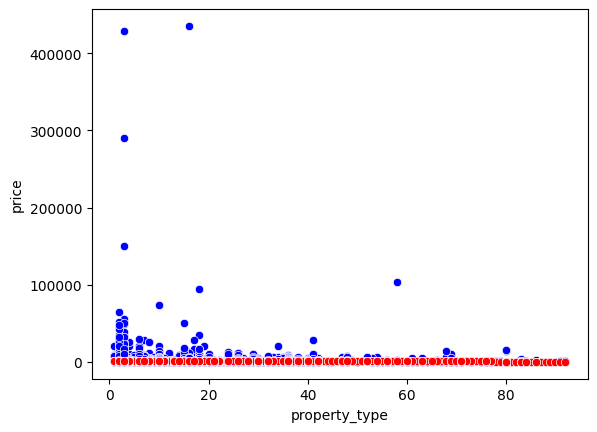

In [336]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
#Regresa el menor error posible a partir de alcohol (funsión de accidentes en relación a alcohol)
sns.scatterplot(x='property_type', y='price', color="blue", data=df1)
sns.scatterplot(x='property_type', y='Predicciones7', color="red", data=df1)


In [337]:
coef_Deter= model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.0006078051995976885

In [338]:
coef_Correl= np.sqrt(coef_Deter)
coef_Correl

np.float64(0.024653705595664287)

GRAFICAS
**************************************************

In [339]:
#Graficamos todas las dispersiones entre todas las variables
#sns.pairplot(df1)

In [340]:
#Encontramos todas las correlaciones entre las varaibles
Corr_Factors=df1.corr()
Corr_Factors

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicciones7,1.000000,0.051199,-0.036121,0.050662,0.073782,0.021877,0.001654,0.024654,-0.361162,0.001654,0.021877,0.073782,0.050662,-0.036121,0.133448,0.051199,-1.000000
Predicciones6,0.051199,1.000000,0.031654,0.074307,0.077092,0.076344,0.000240,0.102128,-0.164868,0.000240,0.076344,0.077092,0.074307,0.031654,0.395418,1.000000,-0.051199
Predicciones5,-0.036121,0.031654,1.000000,0.062134,0.094594,0.315138,-0.092168,0.041126,-0.041372,-0.092168,0.315138,0.094594,0.062134,1.000000,0.058230,0.031654,0.036121
Predicciones4,0.050662,0.074307,0.062134,1.000000,0.136710,0.382265,0.072960,0.012124,-0.166641,0.072960,0.382265,0.136710,1.000000,0.062134,0.106849,0.074307,-0.050662
Predicciones3,0.073782,0.077092,0.094594,0.136710,1.000000,0.319266,-0.056573,0.035935,-0.151866,-0.056573,0.319266,1.000000,0.136710,0.094594,0.079843,0.077092,-0.073782
Predicciones2,0.021877,0.076344,0.315138,0.382265,0.319266,1.000000,-0.105783,0.010929,-0.187228,-0.105783,1.000000,0.319266,0.382265,0.315138,0.137785,0.076344,-0.021877
Predicciones,0.001654,0.000240,-0.092168,0.072960,-0.056573,-0.105783,1.000000,0.014173,0.035740,1.000000,-0.105783,-0.056573,0.072960,-0.092168,-0.032288,0.000240,-0.001654
price,0.024654,0.102128,0.041126,0.012124,0.035935,0.010929,0.014173,1.000000,-0.078422,0.014173,0.010929,0.035935,0.012124,0.041126,0.080482,0.102128,-0.024654
room_type,-0.361162,-0.164868,-0.041372,-0.166641,-0.151866,-0.187228,0.035740,-0.078422,1.000000,0.035740,-0.187228,-0.151866,-0.166641,-0.041372,-0.472809,-0.164868,0.361162
review_scores_cleanliness,0.001654,0.000240,-0.092168,0.072960,-0.056573,-0.105783,1.000000,0.014173,0.035740,1.000000,-0.105783,-0.056573,0.072960,-0.092168,-0.032288,0.000240,-0.001654


In [341]:
#Enocntramos el valor absoluto de todas las relaciones entre las varaibles
Corr_Factors1=abs(Corr_Factors)
Corr_Factors1

,Predicciones7,Predicciones6,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones,price,room_type,review_scores_cleanliness,host_acceptance_rate,host_identity_verified,host_is_superhost,instant_bookable,accommodates,bathrooms,property_type
Predicciones7,1.000000,0.051199,0.036121,0.050662,0.073782,0.021877,0.001654,0.024654,0.361162,0.001654,0.021877,0.073782,0.050662,0.036121,0.133448,0.051199,1.000000
Predicciones6,0.051199,1.000000,0.031654,0.074307,0.077092,0.076344,0.000240,0.102128,0.164868,0.000240,0.076344,0.077092,0.074307,0.031654,0.395418,1.000000,0.051199
Predicciones5,0.036121,0.031654,1.000000,0.062134,0.094594,0.315138,0.092168,0.041126,0.041372,0.092168,0.315138,0.094594,0.062134,1.000000,0.058230,0.031654,0.036121
Predicciones4,0.050662,0.074307,0.062134,1.000000,0.136710,0.382265,0.072960,0.012124,0.166641,0.072960,0.382265,0.136710,1.000000,0.062134,0.106849,0.074307,0.050662
Predicciones3,0.073782,0.077092,0.094594,0.136710,1.000000,0.319266,0.056573,0.035935,0.151866,0.056573,0.319266,1.000000,0.136710,0.094594,0.079843,0.077092,0.073782
Predicciones2,0.021877,0.076344,0.315138,0.382265,0.319266,1.000000,0.105783,0.010929,0.187228,0.105783,1.000000,0.319266,0.382265,0.315138,0.137785,0.076344,0.021877
Predicciones,0.001654,0.000240,0.092168,0.072960,0.056573,0.105783,1.000000,0.014173,0.035740,1.000000,0.105783,0.056573,0.072960,0.092168,0.032288,0.000240,0.001654
price,0.024654,0.102128,0.041126,0.012124,0.035935,0.010929,0.014173,1.000000,0.078422,0.014173,0.010929,0.035935,0.012124,0.041126,0.080482,0.102128,0.024654
room_type,0.361162,0.164868,0.041372,0.166641,0.151866,0.187228,0.035740,0.078422,1.000000,0.035740,0.187228,0.151866,0.166641,0.041372,0.472809,0.164868,0.361162
review_scores_cleanliness,0.001654,0.000240,0.092168,0.072960,0.056573,0.105783,1.000000,0.014173,0.035740,1.000000,0.105783,0.056573,0.072960,0.092168,0.032288,0.000240,0.001654


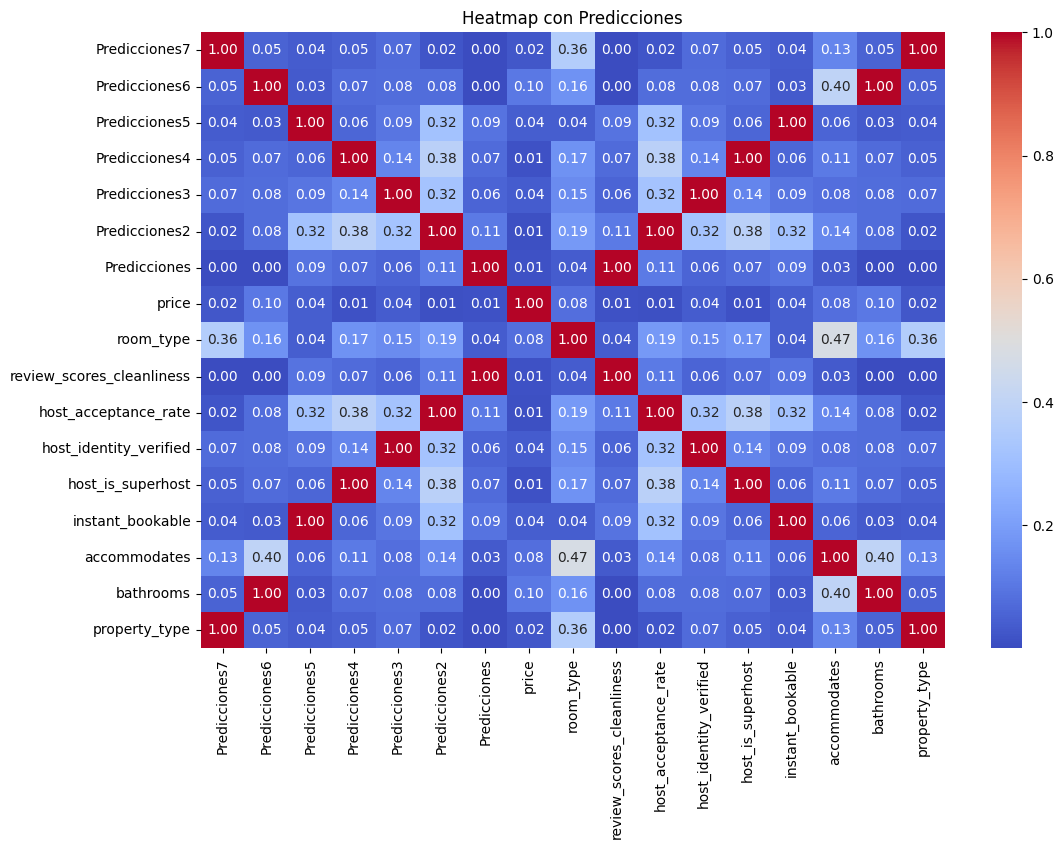

In [342]:
#Graficamos el mapa de calor de los coeficientes de correlación
plt.figure(figsize=(12,8))
sns.heatmap(Corr_Factors1, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Heatmap con Predicciones")
plt.show()

<Axes: >

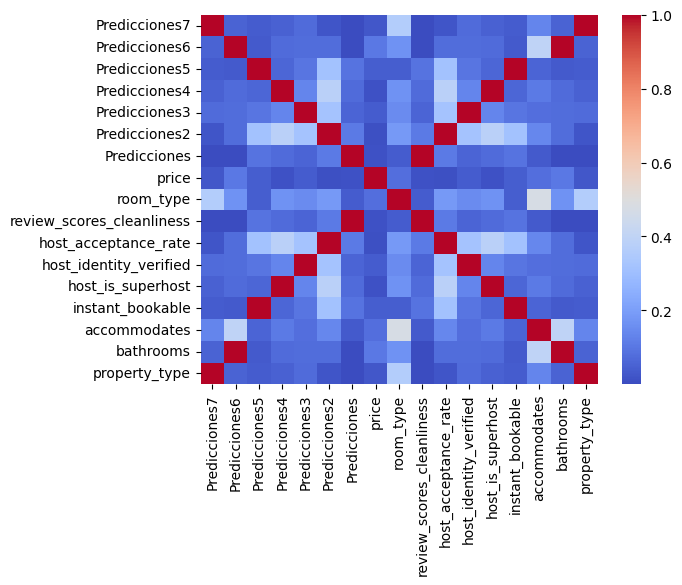

In [343]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap='coolwarm')
Heat_Map

<Axes: >

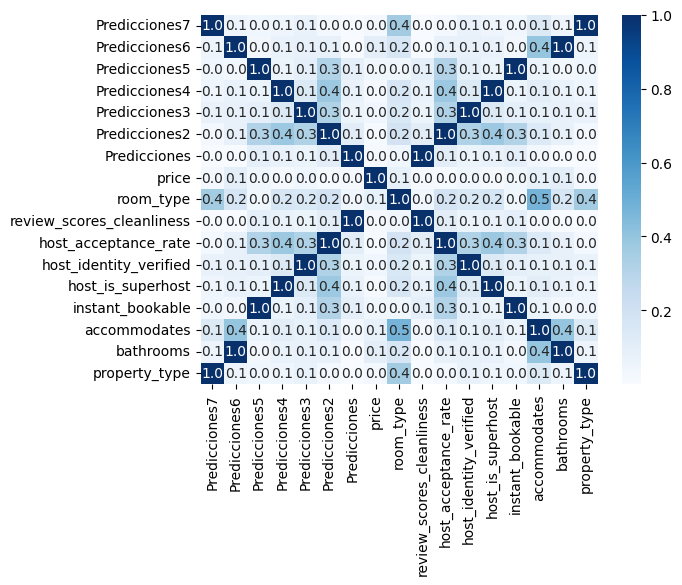

In [344]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map=sns.heatmap(Corr_Factors1, cmap='Blues', annot=True, fmt=".01f")
Heat_Map